
FINAL MODEL PERFORMANCE:

=== Sigmoid ===
[0.0, 0.0] -> 0.0239 -> rounded 0 (expected 0)
[0.0, 1.0] -> 0.9722 -> rounded 1 (expected 1)
[1.0, 0.0] -> 0.9720 -> rounded 1 (expected 1)
[1.0, 1.0] -> 0.0347 -> rounded 0 (expected 0)

=== Tanh ===
[0.0, 0.0] -> 0.0067 -> rounded 0 (expected 0)
[0.0, 1.0] -> 0.9887 -> rounded 1 (expected 1)
[1.0, 0.0] -> 0.9876 -> rounded 1 (expected 1)
[1.0, 1.0] -> 0.0130 -> rounded 0 (expected 0)

=== ReLU ===
[0.0, 0.0] -> 0.0085 -> rounded 0 (expected 0)
[0.0, 1.0] -> 0.9936 -> rounded 1 (expected 1)
[1.0, 0.0] -> 0.9937 -> rounded 1 (expected 1)
[1.0, 1.0] -> 0.0070 -> rounded 0 (expected 0)


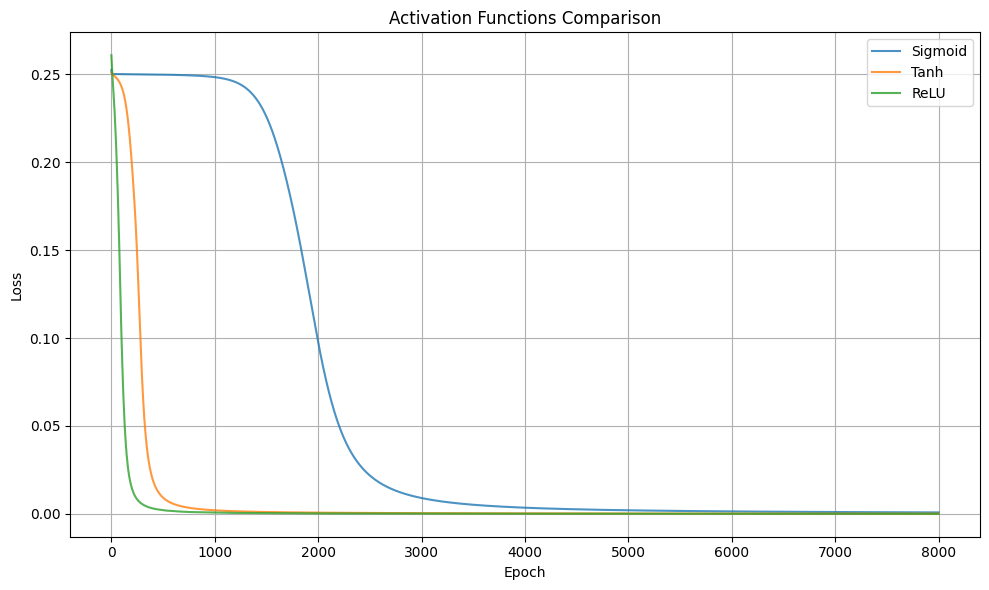

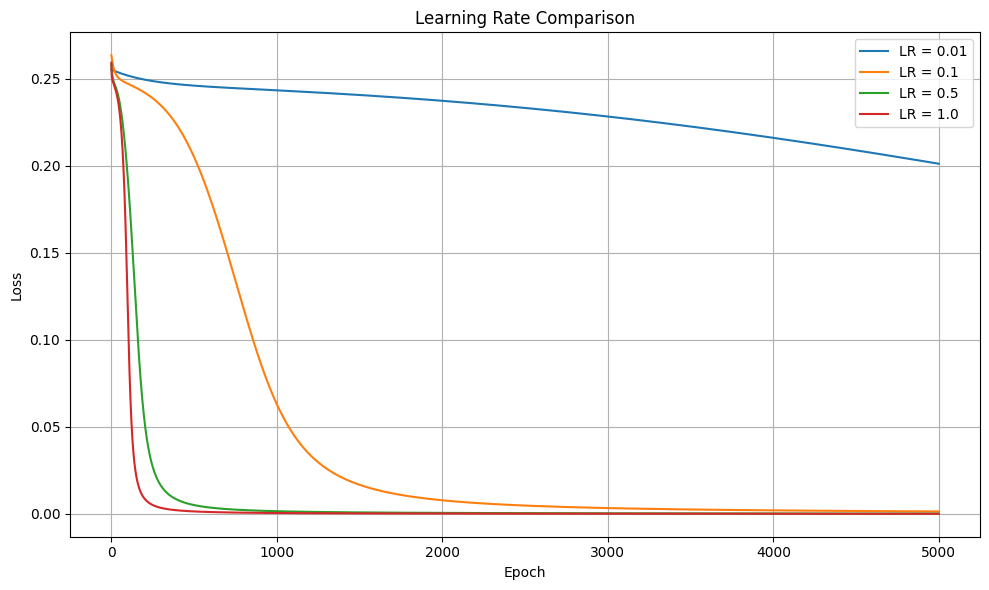

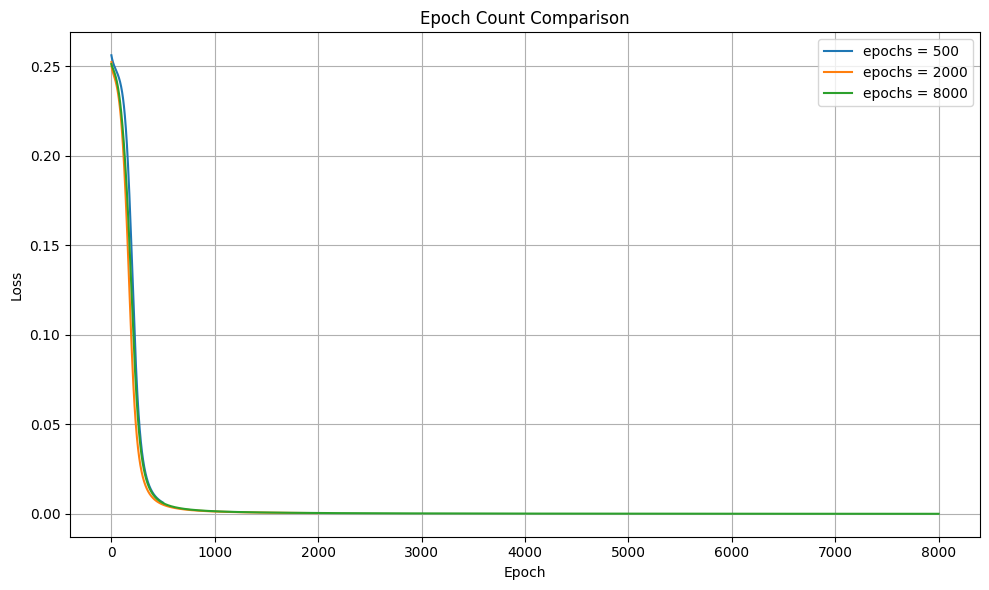

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# ======================================
# XOR DATA
# ======================================
X = torch.tensor([[0., 0.],
                  [0., 1.],
                  [1., 0.],
                  [1., 1.]], dtype=torch.float32)

y = torch.tensor([[0.],
                  [1.],
                  [1.],
                  [0.]], dtype=torch.float32)

# ======================================
# MODELS: sigmoid, tanh, relu
# ======================================

class XOR_Sigmoid(nn.Module):
    def __init__(self, hidden_size=8):
        super().__init__()
        self.l1 = nn.Linear(2, hidden_size)
        self.l2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = torch.sigmoid(self.l1(x))
        x = torch.sigmoid(self.l2(x))
        return x


class XOR_Tanh(nn.Module):
    def __init__(self, hidden_size=8):
        super().__init__()
        self.l1 = nn.Linear(2, hidden_size)
        self.l2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = torch.tanh(self.l1(x))
        x = torch.sigmoid(self.l2(x))
        return x


class XOR_ReLU(nn.Module):
    def __init__(self, hidden_size=8):
        super().__init__()
        self.l1 = nn.Linear(2, hidden_size)
        self.l2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = torch.relu(self.l1(x))
        x = torch.sigmoid(self.l2(x))
        return x


# ======================================
# TRAINING FUNCTION
# ======================================
def train_model(model_class, lr=0.5, epochs=8000, hidden_size=8):
    model = model_class(hidden_size)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    loss_history = []

    for epoch in range(epochs):
        optimizer.zero_grad()
        y_pred = model(X)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()

        loss_history.append(loss.item())

    return loss_history, model


# ======================================
# EXPERIMENT 1 — ACTIVATION COMPARISON
# ======================================
lr = 0.5
epochs = 8000

loss_sig, model_sig = train_model(XOR_Sigmoid, lr, epochs)
loss_tan, model_tan = train_model(XOR_Tanh, lr, epochs)
loss_relu, model_relu = train_model(XOR_ReLU, lr, epochs)

plt.figure(figsize=(10, 6))
plt.plot(loss_sig, label="Sigmoid", alpha=0.8)
plt.plot(loss_tan, label="Tanh", alpha=0.8)
plt.plot(loss_relu, label="ReLU", alpha=0.8)
plt.title("Activation Functions Comparison")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.tight_layout()


# ======================================
# EXPERIMENT 2 — LEARNING RATE COMPARISON
# ======================================
learning_rates = [0.01, 0.1, 0.5, 1.0]
epochs_lr = 5000
hidden_size = 8

plt.figure(figsize=(10, 6))
for lr_val in learning_rates:
    loss_history, _ = train_model(XOR_Tanh, lr=lr_val, epochs=epochs_lr, hidden_size=hidden_size)
    plt.plot(loss_history, label=f"LR = {lr_val}")

plt.title("Learning Rate Comparison")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.tight_layout()


# ======================================
# EXPERIMENT 3 — EPOCHS COMPARISON
# ======================================
epochs_list = [500, 2000, 8000]
lr_for_epochs = 0.5

plt.figure(figsize=(10, 6))
for ep in epochs_list:
    loss_history, _ = train_model(XOR_Tanh, lr=lr_for_epochs, epochs=ep, hidden_size=hidden_size)
    plt.plot(range(ep), loss_history, label=f"epochs = {ep}")

plt.title("Epoch Count Comparison")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.tight_layout()


# ======================================
# FINAL TEST
# ======================================
def test_model(model, name):
    print(f"\n=== {name} ===")
    with torch.no_grad():
        for x_in, y_true in zip(X, y):
            pred = model(x_in)
            print(f"{x_in.tolist()} -> {pred.item():.4f} -> rounded {round(pred.item())} (expected {int(y_true.item())})")


print("\nFINAL MODEL PERFORMANCE:")
test_model(model_sig, "Sigmoid")
test_model(model_tan, "Tanh")
test_model(model_relu, "ReLU")

plt.show()
